In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [2]:
# Load Dataset
df = pd.read_csv('/content/Carbon Emission.csv')
print(df.head())
print(df.columns)

      Sex         Diet     Transport  Vehicle Monthly Distance Km  \
0  female  pescatarian        public                          210   
1  female   vegetarian  walk/bicycle                            9   
2    male     omnivore       private                         2472   
3    male     omnivore  walk/bicycle                           74   
4  female   vegetarian       private                         8457   

   CarbonEmission  
0            2238  
1            1892  
2            2595  
3            1074  
4            4743  
Index(['Sex', 'Diet', 'Transport', 'Vehicle Monthly Distance Km',
       'CarbonEmission'],
      dtype='object')


In [3]:
# Check for Missing Values
print(" Missing values per column:")
print(df.isnull().sum())

 Missing values per column:
Sex                            0
Diet                           0
Transport                      0
Vehicle Monthly Distance Km    0
CarbonEmission                 0
dtype: int64


In [4]:
# Rename column
df = df.rename(columns={
    'Sex': 'sex',
    'Diet': 'diet',
    'Transport': 'transport',
    'Vehicle Monthly Distance Km': 'distance',
    'CarbonEmission': 'co2'
})

In [5]:
print(df.columns)

Index(['sex', 'diet', 'transport', 'distance', 'co2'], dtype='object')


In [6]:
#Label Encoding

cols_to_encode = ['diet', 'sex','transport']
le = LabelEncoder()

for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

print(df)

      sex  diet  transport  distance   co2
0       0     1          1       210  2238
1       0     3          2         9  1892
2       1     0          0      2472  2595
3       1     0          2        74  1074
4       0     3          0      8457  4743
...   ...   ...        ...       ...   ...
9995    1     0          0       268  2408
9996    0     2          0      5316  3084
9997    0     3          2        96  2377
9998    1     2          0      8688  4574
9999    1     1          0      9952   826

[10000 rows x 5 columns]


In [7]:
# Drop the co2 column
X = df.drop('co2', axis=1)
y = df['co2']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
print(X.columns)

Index(['sex', 'diet', 'transport', 'distance'], dtype='object')


In [9]:
# Normalize all Features-- diet,sex,distance,transport
scaler = StandardScaler()
df['diet'] = scaler.fit_transform(df[['diet']])

In [10]:
scaler = StandardScaler()
df['distance'] = scaler.fit_transform(df[['distance']])

In [11]:
scaler = StandardScaler()
df['sex'] = scaler.fit_transform(df[['sex']])

In [12]:
scaler = StandardScaler()
df['transport'] = scaler.fit_transform(df[['transport']])

**Apply Linear regression**

In [20]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [21]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f}")

Linear Regression MSE: 618994.02


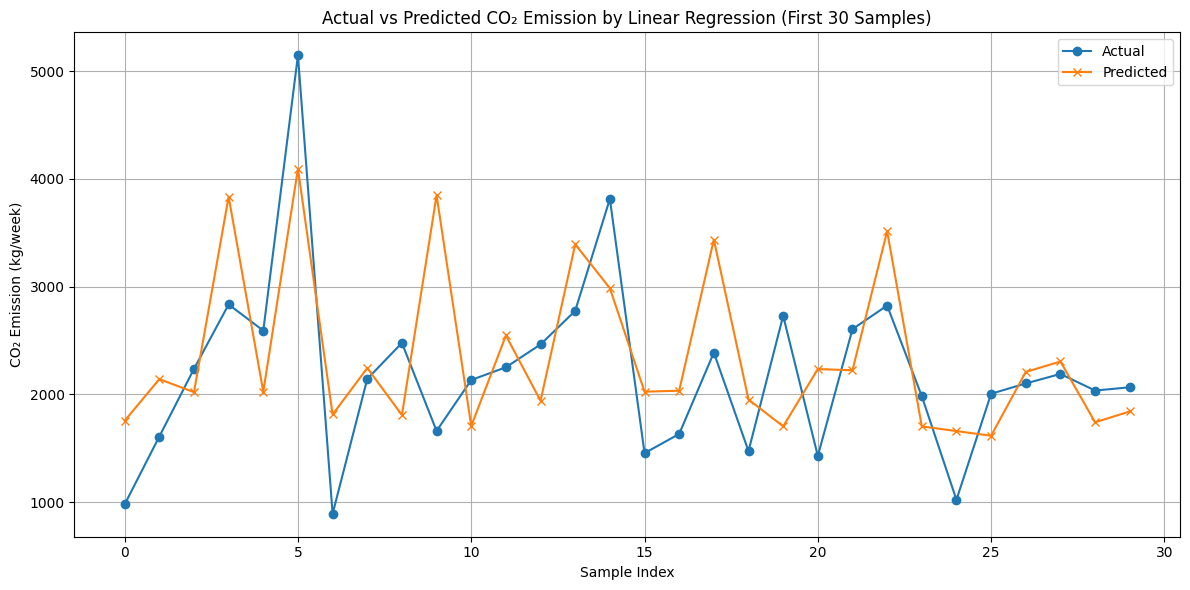

In [22]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted CO₂ Emission by Linear Regression (First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("CO₂ Emission (kg/week)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Apply Random forest**

In [23]:
model =RandomForestRegressor ()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
# Evaluate
mse = mean_squared_error(y_test, y_pred)
print(f"Random forest MSE: {mse:.2f}")

Random forest MSE: 859832.20


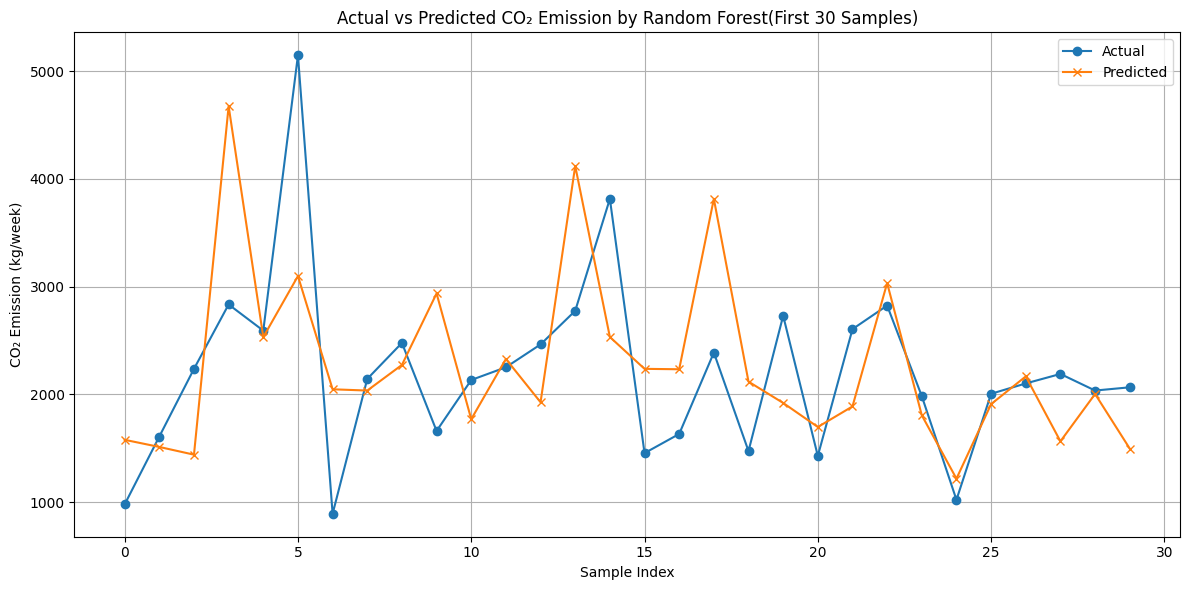

In [25]:
# Visualize Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred[:30], label='Predicted', marker='x')
plt.title("Actual vs Predicted CO₂ Emission by Random Forest(First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("CO₂ Emission (kg/week)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

**Apply CART Model**

In [13]:
# CART Model
cart = DecisionTreeRegressor(random_state=42)
cart.fit(X_train, y_train)
y_pred_cart = cart.predict(X_test)

In [14]:
mse_cart = mean_squared_error(y_test, y_pred_cart)
print(f"🌳 CART MSE: {mse_cart:.2f}")

🌳 CART MSE: 1208839.60


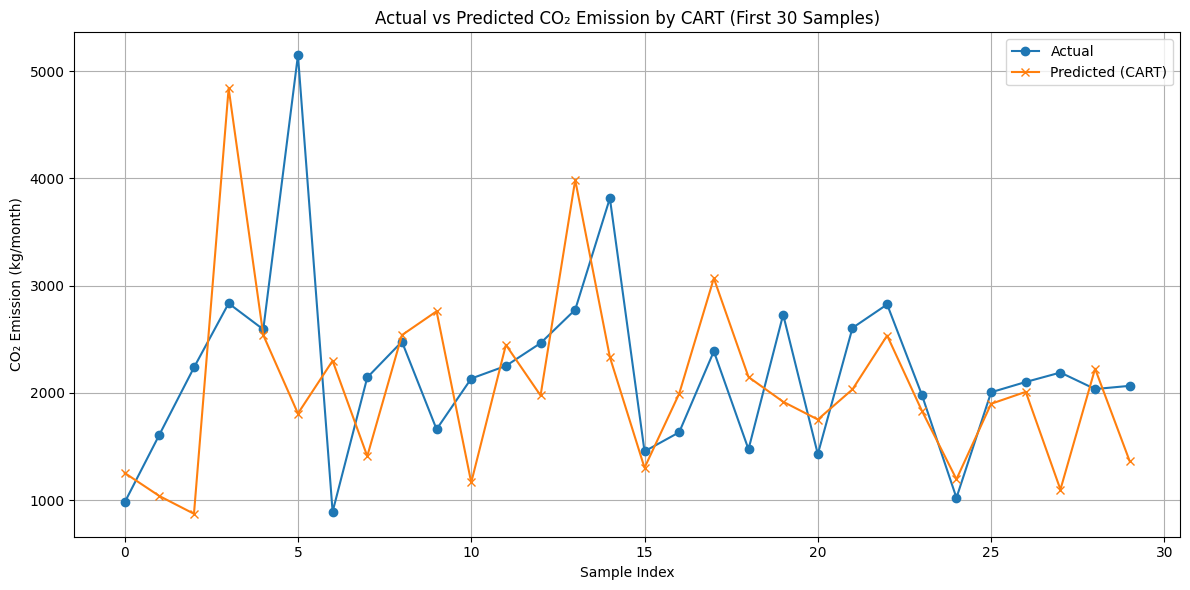

In [16]:
# Visualize CART Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test.values[:30], label='Actual', marker='o')
plt.plot(y_pred_cart[:30], label='Predicted (CART)', marker='x')
plt.title("Actual vs Predicted CO₂ Emission by CART (First 30 Samples)")
plt.xlabel("Sample Index")
plt.ylabel("CO₂ Emission (kg/month)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

